In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

#read the data into a Pandas dataframe
url = '/Users/erelsbernd/Documents/IowaState/IowaStateSpring2017/cs474/hw2/magic04.data'
col_names = ['X0','X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'label']
data = pd.read_csv(url, header = None, names = col_names)

In [3]:
data.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
#define x and y
feature_cols = ['X0', 'X1', 'X2', 'X3','X4', 'X5', 'X6', 'X7','X8','X9']
x1 = data[feature_cols] 
#x = data[:,0:10]
y = data.label 

In [5]:
data['label'] = data['label'].replace(['g', 'h'], [-1, 1]) 
y = data.label


In [7]:
###Normalize the data to use with Gaussian NB
x = preprocessing.scale(x1)
x[:-5,:]

array([[ -5.77226024e-01,  -3.36804191e-01,  -3.81130367e-01, ...,
         -4.05841937e-01,   4.76815870e-01,  -1.49786555e+00],
       [ -5.10968892e-01,  -5.70026657e-01,  -6.48594785e-01, ...,
         -4.90093589e-01,  -8.15418161e-01,   1.53124592e-01],
       [  2.56827756e+00,   6.20585836e+00,   2.61578306e+00, ...,
         -2.18302986e+00,   1.88922413e+00,   8.42635129e-01],
       ..., 
       [ -5.05452382e-01,  -4.52837628e-01,   1.75711652e-04, ...,
          5.21444791e-01,  -6.23661942e-01,  -1.25467214e+00],
       [  3.05096156e+00,   2.96397560e+00,   1.82439308e+00, ...,
         -3.01864184e+00,   2.08878407e+00,   1.19972282e+00],
       [ -2.34921507e-01,  -2.63086138e-01,   1.20254011e-02, ...,
         -1.87460811e-01,   1.94476961e+00,   4.14986582e-01]])

In [8]:
accuracy_scores = []
#100 simulations with best k
for i in range(100):#split x and y into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 6020, train_size = 13000)
    
    # use Gaussian NB with scaled data
    model_gaussianNB = GaussianNB()
    model_gaussianNB.fit(x_train, y_train)
    y_pred = model_gaussianNB.predict(x_test)
    y_pred_prob = model_gaussianNB.predict_proba(x_test)[:, 1]
    accuracy_scores.append(metrics.accuracy_score(y_test, y_pred))
print(max(accuracy_scores))  
print(np.array(accuracy_scores).mean())
#print(metrics.confusion_matrix(y_test,y_pred_class))

0.741362126246
0.72642358804


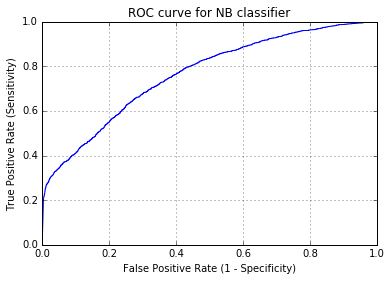

In [9]:

#first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for NB classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)